# What are the most demanded skills for the top 3 most popular data roles ?

### Methodology
1. Clean-up skill column
2. Calculate skill count based on job_title_short
3. Calculate skill percentage
4. Plot final findings

In [95]:
# Importing Libraries
import ast
import pandas as pd
import seaborn as sns
from datasets import load_dataset
import matplotlib.pyplot as plt  

# Loading Data
dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

# Data Cleanup
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda skill: ast.literal_eval(skill) if pd.notna(skill) else skill)

### Clean-up skill column, calculate skill count based on job_title_short

In [96]:
country = 'United States'

df_skills = df.explode('job_skills').copy()
df_skills_count = df_skills.groupby(['job_title_short', 'job_skills']).size()
df_skills_count = df_skills_count.reset_index(name='skill_count')
df_skills_count.sort_values(by='skill_count', ascending=False, inplace=True)

In [97]:
df_skills_count

,job_title_short,job_skills,skill_count
1066,Data Scientist,python,113711
865,Data Engineer,sql,113130
830,Data Engineer,python,108022
625,Data Analyst,sql,92428
1101,Data Scientist,sql,78982
...,...,...,...
266,Cloud Engineer,delphi,1
1920,Senior Data Scientist,objective-c,1
1400,Senior Data Analyst,couchdb,1
298,Cloud Engineer,haskell,1


### Plotting with skill count

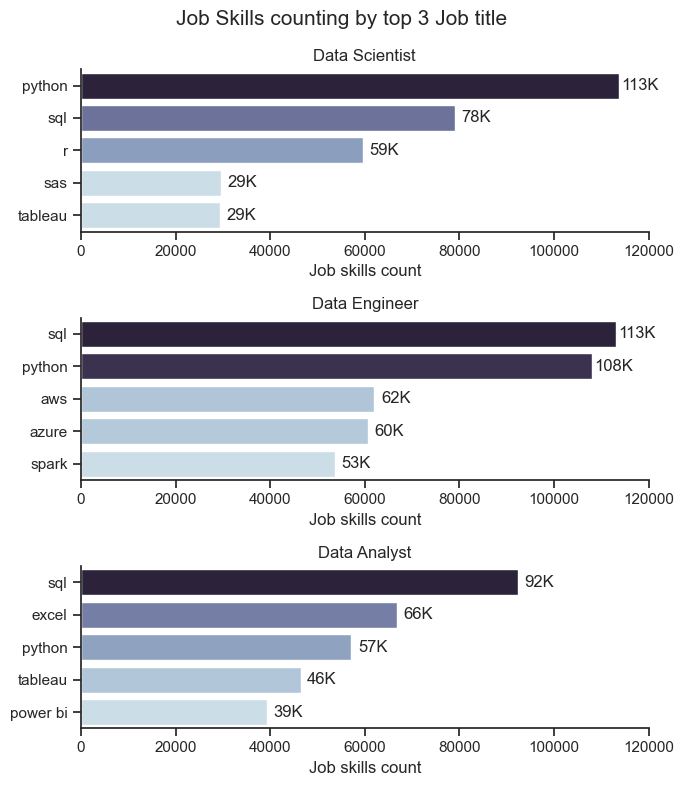

In [123]:
job_title = df_skills_count['job_title_short'].unique().tolist()[:3]

fig, ax = plt.subplots(len(job_title),1, figsize=(7,8))

for i, job_title in enumerate(job_title):
    df_plot = df_skills_count[df_skills_count['job_title_short'] == job_title].head(5)
    sns.barplot(
        data=df_plot,
        x='skill_count',
        y='job_skills',
        ax=ax[i],
        hue='skill_count',
        palette='ch:s=.25,rot=-.25',
        legend=False
    )
    sns.despine()
    ax[i].set_title(job_title)
    ax[i].set_xlabel('Job skills count')
    ax[i].set_ylabel('')
    ax[i].set_xlim(0,120000)

    # Adding labels on each bar with adjusted position
    for bar in ax[i].patches:
        ax[i].text(
            bar.get_width() + 4500,  # Increase the offset to avoid overlap (adjust as needed)
            bar.get_y() + bar.get_height() / 2,  # Center the label vertically
            f'{int(bar.get_width()/1000)}K',  # Format the label as an integer
            ha='center',
            va='center'
        )

plt.suptitle('Job Skills counting by top 3 Job title', fontsize=15)
fig.tight_layout()

### Plotting with skill count percentage (%)

In [99]:
df_job_title_count = df['job_title_short'].value_counts().reset_index(name='title_count')
df_job_title_count

,job_title_short,title_count
0,Data Analyst,196075
1,Data Engineer,186241
2,Data Scientist,172286
3,Business Analyst,49063
4,Software Engineer,44929
5,Senior Data Engineer,44563
6,Senior Data Scientist,36957
7,Senior Data Analyst,29216
8,Machine Learning Engineer,14080
9,Cloud Engineer,12331


In [100]:
df_skills_count

,job_title_short,job_skills,skill_count
1066,Data Scientist,python,113711
865,Data Engineer,sql,113130
830,Data Engineer,python,108022
625,Data Analyst,sql,92428
1101,Data Scientist,sql,78982
...,...,...,...
266,Cloud Engineer,delphi,1
1920,Senior Data Scientist,objective-c,1
1400,Senior Data Analyst,couchdb,1
298,Cloud Engineer,haskell,1


In [101]:
df_skills_pct = pd.merge(df_skills_count, df_job_title_count, how='left', on='job_title_short')

df_skills_pct['skill_pct'] = (df_skills_pct['skill_count'] / df_skills_pct['title_count']) * 100

df_skills_pct

,job_title_short,job_skills,skill_count,title_count,skill_pct
0,Data Scientist,python,113711,172286,66.001300
1,Data Engineer,sql,113130,186241,60.743875
2,Data Engineer,python,108022,186241,58.001192
3,Data Analyst,sql,92428,196075,47.139105
4,Data Scientist,sql,78982,172286,45.843539
...,...,...,...,...,...
2251,Cloud Engineer,delphi,1,12331,0.008110
2252,Senior Data Scientist,objective-c,1,36957,0.002706
2253,Senior Data Analyst,couchdb,1,29216,0.003423
2254,Cloud Engineer,haskell,1,12331,0.008110


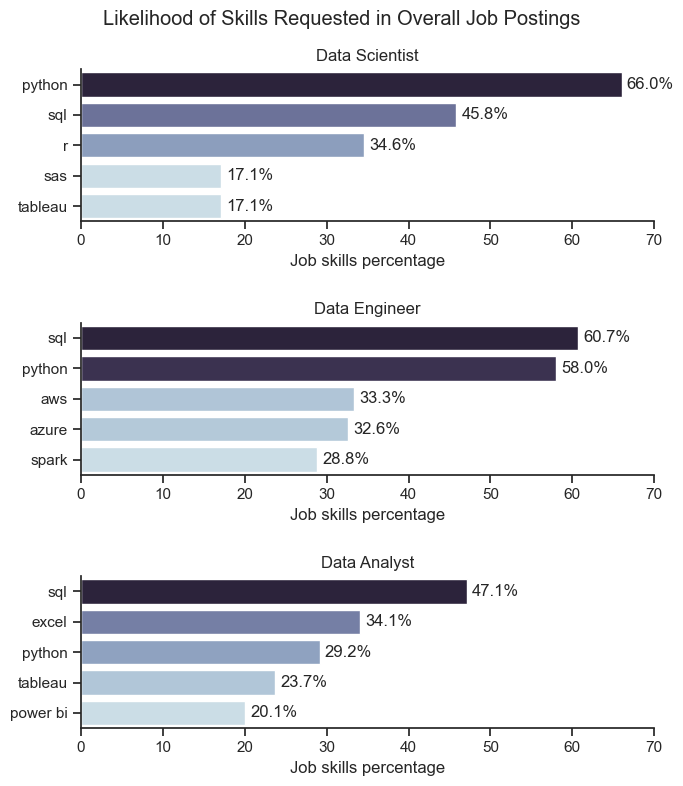

In [144]:
job_title = df_skills_pct['job_title_short'].unique().tolist()[:3]

fig, ax = plt.subplots(len(job_title),1, figsize=(7,8))

for i, job_title in enumerate(job_title):
    df_plot = df_skills_pct[df_skills_pct['job_title_short'] == job_title].head(5)
    sns.barplot(
        data=df_plot,
        x='skill_pct',
        y='job_skills',
        ax=ax[i],
        hue='skill_pct',
        palette='ch:s=.25,rot=-.25',
        legend=False
    )
    sns.set_theme(style='ticks')
    sns.despine()
    ax[i].set_title(job_title)
    ax[i].set_xlabel('Job skills percentage')
    ax[i].set_ylabel('')
    ax[i].set_xlim(0,70)

    # Adding label for each bar
    for bar in ax[i].patches:
        ax[i].text(
            bar.get_width() + 3.5,
            bar.get_y() + bar.get_height() / 2,  # Center the label vertically
            f'{bar.get_width():.1f}%',  # Format the label as an integer
            ha='center',
            va='center'
        )

fig.suptitle('Likelihood of Skills Requested in Overall Job Postings')
fig.tight_layout(h_pad=2)